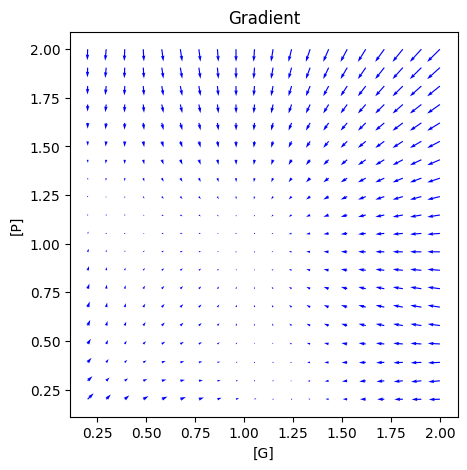

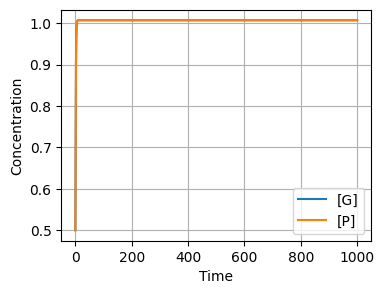

In [87]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def derivative(G, P, n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2):
    f1 = a1*G**n/(theta_a1**n+G**n)
    f2 = a2*P**n/(theta_a2**n+P**n)
    d1 = b1*theta_b1**m/(theta_b1**m+(G*P)**m)
    d2 = b2*theta_b2**m/(theta_b2**m+(G*P)**m)
    dG_dt = f1+d1-k1*G
    dP_dt = f2+d2-k2*P
    return dG_dt, dP_dt

def model(y, t, n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2):
    G, P = y
    f1 = a1*G**n/(theta_a1**n+G**n)
    f2 = a2*P**n/(theta_a2**n+P**n)
    d1 = b1*theta_b1**m/(theta_b1**m+(G*P)**m)
    d2 = b2*theta_b2**m/(theta_b2**m+(G*P)**m)
    dG_dt = f1+d1-k1*G
    dP_dt = f2+d2-k2*P
    return dG_dt, dP_dt

# Parameters
n=4
m=1

a1=1
a2=1

b1=1
b2=1

theta_a1=0.5
theta_a2=0.5

theta_b1=0.07
theta_b2=0.07

k1=1
k2=1

P0=0.5
G0=0.5

G=np.linspace(0.2, 2, 20)
P=np.linspace(0.2, 2, 20)
GG, PP = np.meshgrid(G, P)

dG_dt,dP_dt=derivative(GG, PP, n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2)

#dist=(np.abs(dG_dt)**2+np.abs(dP_dt)**2)**0.5
#dG_dt=dG_dt/dist
#dP_dt=dP_dt/dist

plt.figure(figsize=(5,5))
plt.quiver(GG, PP, dG_dt, dP_dt, scale=30, scale_units=None, angles='xy', color='blue', width=0.003)
#plt.plot([np.min(G),np.max(G)],[np.min(P),np.max(P)],'r-')
plt.xlabel('[G]')
plt.ylabel('[P]')
plt.title('Gradient')

# Time array
t = np.linspace(0, 1000, 10000)

# Sample initial conditions on a log scale
#initial_conditions = np.logspace(-3, 0.18, 5)  # Adjust the range as needed

# Create a list to store simulation results
#population_trajectories = []

# Perform multiple simulations with different initial conditions
#for N0 in initial_conditions:
    #N = odeint(logistic_growth_with_dilution, N0, t, args=(mu, Nm, D))
    #population_trajectories.append(N)

result = odeint(model, [G0, P0], t, args=(n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2))
# Plot results
plt.figure(figsize=(4, 3))
#for i, N in enumerate(population_trajectories):
#    plt.semilogy(t, N, label=f'Initial N0 = {initial_conditions[i]:.3f}')
plt.plot(t,result[:,0],label='[G]')
plt.plot(t,result[:,1],label='[P]')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
#plt.title('')
plt.grid(True)
plt.show()


In [9]:
from scipy.optimize import root
import numpy as np
from scipy.optimize import minimize

global n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2

def derivative(G,P):
    f1 = a1*G**n/(theta_a1**n+G**n)
    f2 = a2*P**n/(theta_a2**n+P**n)
    d1 = b1*theta_b1**m/(theta_b1**m+(G*P)**m)
    d2 = b2*theta_b2**m/(theta_b2**m+(G*P)**m)
    dG_dt = f1+d1-k1*G
    dP_dt = f2+d2-k2*P
    return (dG_dt**2 + dP_dt**2)**0.5

def find_zero(G, P,parameters):
    n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2 = parameters
    GG, PP = np.meshgrid(G, P)
    GG=GG.reshape(np.size(GG))
    PP=PP.reshape(np.size(PP))
    return minimize(derivative,GG,PP)

G=np.linspace(0.2, 2, 20)
P=np.linspace(0.2, 2, 20)

n_p=np.linspace(0.2, 2, 20)
m_p=np.linspace(0.2, 2, 20)
a1_p=np.linspace(0.2, 2, 20)
b1_p=np.linspace(0.2, 2, 20)
a2_p=np.linspace(0.2, 2, 20)
b2_p=np.linspace(0.2, 2, 20)
theta_a1_p=np.linspace(0.2, 2, 20)
theta_b1_p=np.linspace(0.2, 2, 20)
k1_p=np.linspace(0.2, 2, 20)
theta_a2_p=np.linspace(0.2, 2, 20)
theta_b2_p=np.linspace(0.2, 2, 20)
k2_p=np.linspace(0.2, 2, 20)

sol=[]

for n_in in n_p:
    for m_in in m_p:
        for a1_in in a1_p:
            for b1_in in b1_p:
                for a2_in in a2_p:
                    for b2_in in b2_p:
                        for theta_a1_in in theta_a1_p:
                            for theta_b1_in in theta_b1_p:
                                for k1_in in k1_p:
                                    for theta_a2_in in theta_a2_p:
                                        for theta_b2_in in theta_b2_p:
                                            for k2_in in k2_p:
                                                sol.append(find_zero(G,P,(n_in,m_in,a1_in,b1_in,a2_in,b2_in,theta_a1_in,theta_b1_in,k1_in,theta_a2_in,theta_b2_in,k2_in)))

print(sol)

C:\Users\HP\AppData\Local\Temp\ipykernel_16420\1144864302.py:21: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  return minimize(derivative,[GG,PP])


TypeError: derivative() missing 1 required positional argument: 'P'

In [98]:
from sympy import *
import numpy as np

global n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2
n=4
m=1

a1=1
a2=1

b1=1
b2=1

theta_a1=0.5
theta_a2=0.5

theta_b1=0.07
theta_b2=0.07

k1=1
k2=1

G_var,P_var = symbols('G_var,P_var')

f1 = a1*G_var**n/(theta_a1**n+G_var**n)
f2 = a2*P_var**n/(theta_a2**n+P_var**n)
d1 = b1*theta_b1**m/(theta_b1**m+(G_var*P_var)**m)
d2 = b2*theta_b2**m/(theta_b2**m+(G_var*P_var)**m)
dG_dt = f1+d1-k1*G_var
dP_dt = f2+d2-k2*P_var
#f = (dG_dt**2 + dP_dt**2)**0.5
#f = dG_dt + dP_dt
f = dG_dt * dP_dt
#f=G_var*G_var+(P_var-1)*(P_var-1)

def get_grad(f, X):

    f1 = diff(f, G_var)
    f2 = diff(f, P_var)

    grad = np.array([f1.subs([(G_var, X[0]), (P_var, X[1])]),
                     f2.subs([(G_var, X[0]), (P_var, X[1])])])
    return grad

def get_hess(f, X):

    f1 = diff(f, G_var)
    f2 = diff(f, P_var)
    f11 = diff(f,G_var,2)
    f22 = diff(f,P_var,2)
    f12 = diff(f1,P_var)
    f21 = diff(f2,G_var)
    hess = np.array([[f11.subs([(G_var,X[0]), (P_var,X[1])]), f12.subs([(G_var,X[0]), (P_var,X[1])])],
                     [f21.subs([(G_var,X[0]), (P_var,X[1])]), f22.subs([(G_var,X[0]), (P_var,X[1])])]])

    hess = np.array(hess, dtype = 'float')
    return hess

def newton_iter(X0, err, Max_iter):
    
    count = 0
    X1 = np.array([0,0])
    while count<=Max_iter:

        X2 = X0 - X1
        if sqrt(X2[0]**2 + X2[1]**2) <= err:
            break
        else:
            hess = get_hess(f, X0)
            
            hess_inv = np.linalg.inv(hess)
            grad = get_grad(f, X0)
            X1 = X0 
            
            X0 = X1 - np.dot(hess_inv, grad)
            count += 1
            print('# of iterations:',count,'Current result:','G=',X0[0],'P=',X0[1])
    print('# of iterations:',count)
    print('Result:',X0)
    print('Function value:',f.subs([(G_var, X0[0]), (P_var, X0[1])]))
    print("Gradient:",grad)
    print("Hessian matrix determinant:",hess[0][0]*hess[1][1]-hess[0][1]*hess[1][0])

X0 = np.array([0.2,1.5])
err = 1e-8
Max_iter=100
newton_iter(X0, err, Max_iter)


# of iterations: 1 Current result: G= 0.222368429700007 P= 1.23754488232529
# of iterations: 2 Current result: G= 0.244185327871568 P= 1.17882415605675
# of iterations: 3 Current result: G= 0.253223280064784 P= 1.16101992973652
# of iterations: 4 Current result: G= 0.254923533413764 P= 1.15813984229715
# of iterations: 5 Current result: G= 0.254981039959485 P= 1.15804928806699
# of iterations: 6 Current result: G= 0.254981102166950 P= 1.15804919447379
# of iterations: 7 Current result: G= 0.254981102167020 P= 1.15804919447368
# of iterations: 7
Result: [0.254981102167020 1.15804919447368]
Function value: 3.08148791101958e-33
Gradient: [2.11012892514654e-14 -2.62826245999306e-14]
Hessian matrix determinant: -0.3722411962371706


In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def derivative(G, P, n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2):
    f1 = a1*G**n/(theta_a1**n+G**n)
    f2 = a2*P**n/(theta_a2**n+P**n)
    d1 = b1*theta_b1**m/(theta_b1**m+(G*P)**m)
    d2 = b2*theta_b2**m/(theta_b2**m+(G*P)**m)
    dG_dt = f1+d1-k1*G
    dP_dt = f2+d2-k2*P
    return dG_dt, dP_dt

def model(y, t, n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2):
    G, P = y
    f1 = a1*G**n/(theta_a1**n+G**n)
    f2 = a2*P**n/(theta_a2**n+P**n)
    d1 = b1*theta_b1**m/(theta_b1**m+(G*P)**m)
    d2 = b2*theta_b2**m/(theta_b2**m+(G*P)**m)
    dG_dt = f1+d1-k1*G
    dP_dt = f2+d2-k2*P
    return dG_dt, dP_dt

# Parameters
err=1e-8
n_p=np.linspace(0.2, 2, 2)
m_p=np.linspace(0.2, 2, 2)
a1_p=np.linspace(0.2, 2, 2)
b1_p=np.linspace(0.2, 2, 2)
a2_p=np.linspace(0.2, 2, 2)
b2_p=np.linspace(0.2, 2, 2)
theta_a1_p=np.linspace(0.2, 2, 2)
theta_b1_p=np.linspace(0.2, 2, 2)
k1_p=np.linspace(0.2, 2, 2)
theta_a2_p=np.linspace(0.2, 2, 2)
theta_b2_p=np.linspace(0.2, 2, 2)
k2_p=np.linspace(0.2, 2, 2)

G=np.linspace(0.2, 2, 2)
P=np.linspace(0.2, 2, 2)

f=open('data.csv','w')
# Time array
t = np.linspace(0, 1000, 10000)
sol=[]
for n_in in n_p:
    for m_in in m_p:
        for a1_in in a1_p:
            for b1_in in b1_p:
                for a2_in in a2_p:
                    for b2_in in b2_p:
                        for theta_a1_in in theta_a1_p:
                            for theta_b1_in in theta_b1_p:
                                for k1_in in k1_p:
                                    for theta_a2_in in theta_a2_p:
                                        for theta_b2_in in theta_b2_p:
                                            for k2_in in k2_p:
                                                sol.append([])
                                                for G0 in G:
                                                    for P0 in P:
                                                        result = odeint(model, [G0, P0], t, args=(n_in,m_in,a1_in,b1_in,a2_in,b2_in,theta_a1_in,theta_b1_in,k1_in,theta_a2_in,theta_b2_in,k2_in))
                                                        sol[-1].append([n_in,m_in,a1_in,b1_in,a2_in,b2_in,theta_a1_in,theta_b1_in,k1_in,theta_a2_in,theta_b2_in,k2_in,np.mean(result[-100:-1,0]),np.mean(result[-100:-1,1])])

for i in range(len(sol)):
    j=0
    while j < len(sol[i]):
        for m in range(j):
            if np.abs(sol[i][j][-1]-sol[i][m][-1])<err and np.abs(sol[i][j][-2]-sol[i][m][-2])<err:
                del sol[i][j]
                j-=1
                break
        j+=1
f.write("n,m,a1,b1,a2,b2,theta_a1,theta_b1,k1,theta_a2,theta_b2,k2,G,P\n")
for i in range(len(sol)):
    for j in range(len(sol[i])):
        f.write(str(sol[i][j][0]))
        for m in range(1,len(sol[i][j])):
            f.write(','+str(sol[i][j][m]))
        f.write('\n')
#print(sol)
f.close()

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 17 08:41:07 2021

@author: HP
"""

from __future__ import absolute_import, division, print_function
import time #time measuring

import pandas as pd
import numpy as np
import tensorflow as tf
#from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy.random import seed
from tensorflow.random import set_seed
from sklearn.metrics import mean_squared_error #mse
from sklearn.metrics import mean_absolute_error #mae
from sklearn.metrics import r2_score#R square

seed(1)
set_seed(2)

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
   
py1=['py'+str(i) for i in range (101,133)] 

df = pd.read_csv('data.csv', header= 0)
df.head()
         
X = df.loc[0:len(df),'n':'k2']

y = df.loc[0:len(df),'G':'P']

X.head()

in_length=X.shape[1]

out_length=y.shape[1]


train_dataset, test_dataset, train_labels, test_labels = train_test_split(X,y,test_size = 0.1, random_state = 0)
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

model = Sequential()
# model 1
# model.add(Dense(in_length, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]))
# model.add(Dense(64, activation=tf.nn.relu))
# model.add(Dense(out_length))

# model 2
#model.add(Dense(in_length, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]))
#model.add(Dense(64, activation=tf.nn.relu))
#model.add(Dense(64, activation=tf.nn.relu))
#model.add(Dense(32, activation=tf.nn.relu))
#model.add(Dense(out_length))

# model 3
'''
model.add(Dense(in_length, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dense(out_length))

'''

# model 4
model.add(Dense(in_length, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]))
#model.add(Dense(64, activation=tf.nn.relu))
model.add(Dense(32, activation=tf.nn.relu))
model.add(Dense(16, activation=tf.nn.relu))
#model.add(Dense(8, activation=tf.nn.relu))
model.add(Dense(out_length))


'''
# model 5
model.add(Dense(in_length, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dense(8, activation=tf.nn.relu))
model.add(Dense(out_length))
'''
'''
# model 6
model.add(Dense(in_length, activation=tf.nn.tanh, input_shape=[len(train_dataset.keys())]))
model.add(Dense(64, activation=tf.nn.tanh))
#model.add(Dense(128, activation=tf.nn.tanh))
#model.add(Dense(128, activation=tf.nn.tanh))
#model.add(Dense(128, activation=tf.nn.tanh))
model.add(Dense(128, activation=tf.nn.tanh))
#model.add(Dense(64, activation=tf.nn.tanh))
model.add(Dense(64, activation=tf.nn.tanh))
model.add(Dense(out_length))
'''
'''
# model 7
model.add(Dense(in_length, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]))
model.add(Dense(64, activation=tf.nn.relu))
#model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dense(out_length))
'''

'''
# model 8
model.add(Dense(in_length, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dense(out_length))
'''

#optimizer = RMSprop(lr=0.001)
optimizer=tf.keras.optimizers.Adam(lr=4e-4)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae','mse'])

#history = model.fit(train_dataset, train_labels,  batch_size=10, epochs=1000, validation_split = 0.2, verbose=0)
#plot_history(history)

T1 = time.time()#timer

#model.fit(normed_train_data, train_labels,  batch_size=10, epochs=30000, validation_split = 0.1, verbose=0)
#model.fit(normed_train_data, train_labels,  batch_size=50, epochs=20000, validation_split = 0.1, verbose=0)
#model.fit(normed_train_data, train_labels,  batch_size=30, epochs=20000, validation_split = 0.1, verbose=0)
#model.fit(normed_train_data, train_labels,  batch_size=50, epochs=20000, validation_split = 0.1, verbose=0)
#model.fit(normed_train_data, train_labels,  batch_size=30, epochs=12000, validation_split = 0.1, verbose=0)
#model.fit(normed_train_data, train_labels,  batch_size=30, epochs=12000, validation_split = 0.2, verbose=0)
#model.fit(normed_train_data, train_labels,  batch_size=50, epochs=12000, validation_split = 0.2, verbose=0)
model.fit(normed_train_data, train_labels,  batch_size=10, epochs=12000, validation_split = 0.2, verbose=0)
#model.fit(normed_train_data, train_labels,  batch_size=30, epochs=3000, validation_split = 0.1, verbose=0)



T2 = time.time()#timer

model.summary()

new_test_data = normed_test_data.to_numpy()
new_test_labels = test_labels.to_numpy()

loss, mae, mse = model.evaluate(normed_test_data, new_test_labels, verbose=0)

train_labels_pred = model.predict(normed_train_data)
test_labels_pred = model.predict(new_test_data)

score = model.evaluate(norm(X), y, verbose=0)

#print('Test accuracy:', score[1])

#R2=model.score(train_labels,train_labels_pred)
print("Test Mean absolute error:", mae)
print("Test Mean square error:", mse)
#print(model.predict(norm(X)))

print('Time consumed: %s s'%(T2-T1))
minute=float(T2-T1)/60
print('Time consumed: %f min'%(minute))

#plot data
predict=model.predict(norm(X))

MSE=mean_squared_error(y,predict)
RMSE=np.sqrt(mean_squared_error(y,predict))
MAE=mean_absolute_error(y,predict)
R2=r2_score(y,predict)
#Adjusted_R2=1-((1-r2_score(y,predict))*(n-1))/(n-p-1)

print ('Test score:',R2)
'''
#plot data for all factor together
plt.plot(df['TIME'], y,'b.')
plt.plot(df['TIME'], predict, 'r.')
plt.xlabel('TIME')
plt.ylabel('hg')
plt.show()
'''
#plot data for each factor
'''
for i in range (0,len(log)):
    plt.plot(df['TIME'], y[log[i]],'b.')
    plt.plot(df['TIME'], predict[:,i], 'r.')
    plt.xlabel('TIME')
    plt.ylabel('logy'+str(i+1))
    plt.show()
    R2factor=r2_score(y[log[i]],predict[:,i])
    print('Test score for correction factor'+str(i+1)+':',end='')
    print(R2factor)
'''

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


KeyboardInterrupt: 